<a href="https://colab.research.google.com/github/edwardhan925192/ML-Deep-Learning/blob/main/Vision/covid_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 			 	        #Path Object로 만들어줌 
import PIL.Image as image 	 	#jpg를 screen에서 보여준다. 
import cv2
     

In [2]:
from keras.regularizers import l1, l2, l1_l2

In [18]:
reg = l2(0.0001)


In [4]:
image_shape = (160,160)

In [5]:
covid_data = pathlib.Path('/content/drive/MyDrive/data/covid data')

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(160,160,3),kernel_regularizer=reg))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),kernel_regularizer=reg))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3),kernel_regularizer=reg))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3),kernel_regularizer=reg))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,    
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10,
    brightness_range = (0.9,1.1),
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    covid_data,
    target_size=image_shape,
    batch_size = 6,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    covid_data, 
    target_size=image_shape,
    batch_size = 6,
    class_mode='binary',
    shuffle= False,
    subset='validation')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Found 560 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 6,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 6,
    epochs = 35)

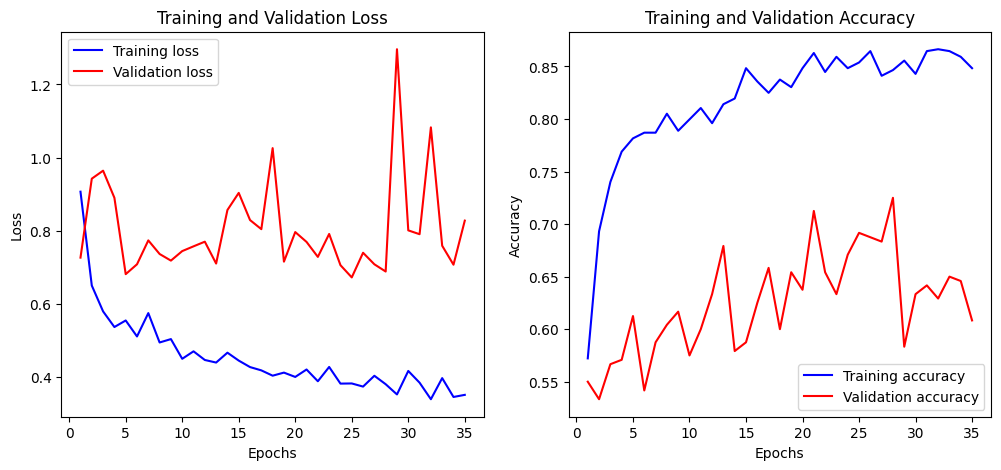

In [27]:
# Retrieve loss, validation loss, accuracy, and validation accuracy from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epoch numbers for the x-axis
epochs = range(1, len(loss) + 1)

# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss on the first subplot (ax1)
ax1.plot(epochs, loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy on the second subplot (ax2)
ax2.plot(epochs, accuracy, 'b', label='Training accuracy')
ax2.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Display the subplots
plt.show()
